In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image, ImageOps
import os

In [3]:
# image examples
im1 = 'data/original/09.JPG' 
im2 = 'data/original/13.JPG'
im3 = 'data/cropped/09.JPG' 
im4 = 'data/cropped/13.JPG'

In [5]:
# resize with the shortest edge

def resize(im, fixed_size=224):
    w, h = im.size
    if w <= h:  # fixed width to 224
        width_percent = (fixed_size / w)
        height_size = int(h * width_percent)
        im = im.resize((fixed_size, height_size), Image.NEAREST)
    else:  # fixed height to 224
        height_percent = (fixed_size / h)
        width_size = int((w * height_percent))
        im = im.resize((width_size, fixed_size), Image.NEAREST)
    return im

# center crop an image assuming the image is larger than 224 x 224

def center_crop(img, w_crop=224, h_crop=224):

    w, h = img.size  
    # int() handles size with odd number 
    # coordinates for the left upper and lower right corner points
    left = int(w/2 - w_crop/2)
    upper = int(h/2 - h_crop/2)
    right = left + w_crop
    lower = upper + h_crop

    img_cropped = img.crop((left, upper, right, lower))
    return img_cropped

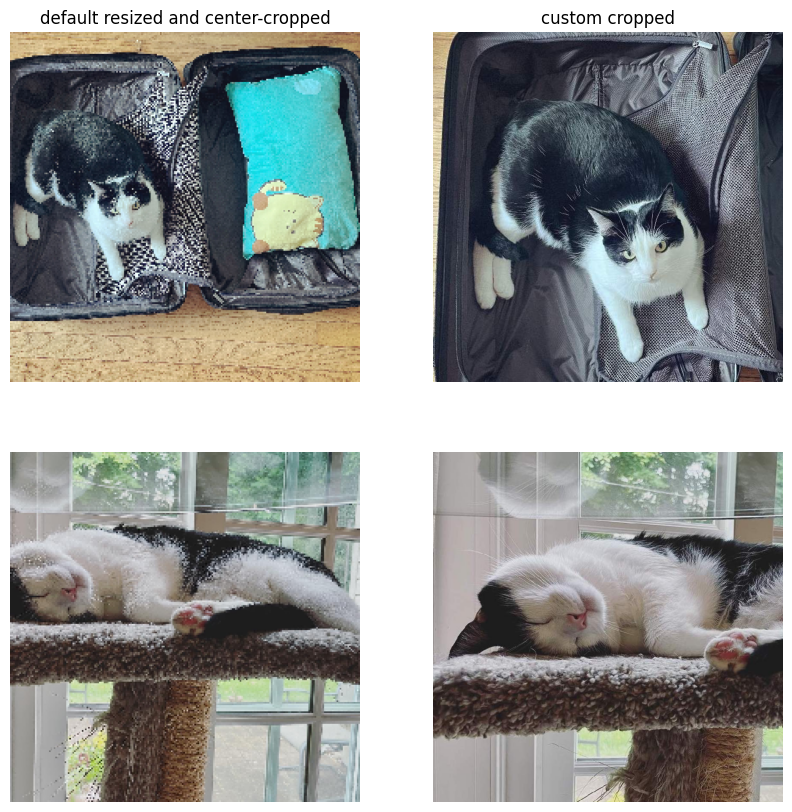

In [12]:
# resize and then center crop

img1 = Image.open(im1)
img2 = Image.open(im2)
img3 = Image.open(im3)
img4 = Image.open(im4)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(center_crop(resize(img1)))
ax[0, 0].set_title('default resized and center-cropped')
ax[1, 0].imshow(center_crop(resize(img2)))
ax[0, 1].set_title('custom cropped')
ax[0, 1].imshow(img3)
ax[1, 1].imshow(img4)
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].axis('off')
ax[1, 1].axis('off')

fig.savefig('resize-crop-example.jpg')